In [17]:
# Função para extrair o tamanho da instância do nome
def extrair_tamanho(instancia):
    match = re.search(r'\d+', instancia)
    return int(match.group()) if match else None

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Ler o arquivo txt e converter em DataFrame
df = pd.read_csv('results_tsp.txt')

# Aplicar a função para extrair o tamanho da instância e criar uma nova coluna 'Tamanho'
df['Tamanho'] = df['Instancia'].apply(extrair_tamanho)
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

df = df[df['Resultado'] != 'timeout']

# agrupar por instância
# Converter a coluna 'Resultado' para numérico, ignorando os 'null'
df['Resultado'] = pd.to_numeric(df['Resultado'], errors='coerce')

# Criar DataFrames separados para cada algoritmo
df_tatt = df[df['Algoritmo'] == 'tatt']
df_ctfds = df[df['Algoritmo'] == 'ctfds']

# Calcular as diferenças percentuais para cada instância
df_final = df_tatt[['Instancia', 'Tamanho', 'Resultado']].merge(
    df_ctfds[['Instancia', 'Resultado']], on='Instancia', suffixes=('_tatt', '_ctfds')
)

df_final['Diferenca'] = (df_final['Resultado_ctfds']) / df_final['Resultado_tatt'] * 100

In [19]:
df_final

,Instancia,Tamanho,Resultado_tatt,Resultado_ctfds,Diferenca
0,eil51.tsp,51,584.0,462.0,79.109589
1,berlin52.tsp,52,10114.0,8591.0,84.941665
2,st70.tsp,70,888.0,770.0,86.711712
3,eil76.tsp,76,696.0,608.0,87.356322
4,pr76.tsp,76,145336.0,116684.0,80.285683
...,...,...,...,...,...
66,u2319.tsp,2319,320506.0,271669.0,84.762532
67,pr2392.tsp,2392,523107.0,425940.0,81.425024
68,pcb3038.tsp,3038,197498.0,154670.0,78.314717
69,fl3795.tsp,3795,36256.0,31935.0,88.081973


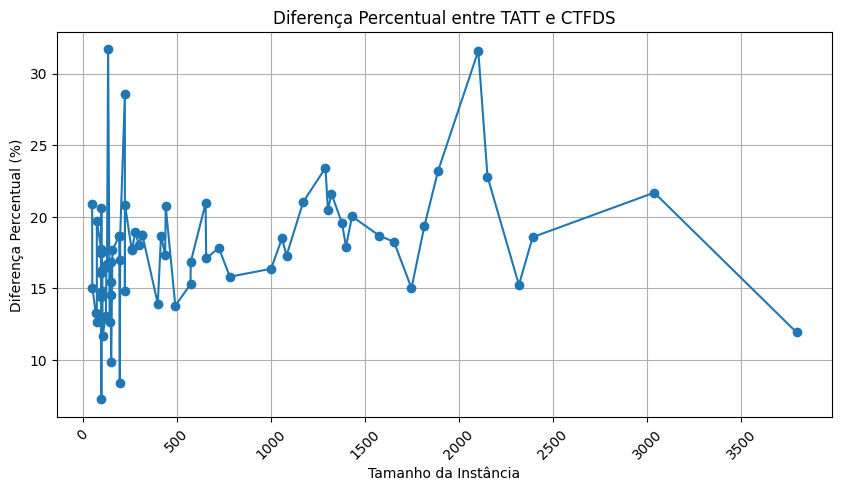

In [20]:
# Plotar o gráfico de diferença percentual

# remove nan de diferenca
df_final = df_final[df_final['Diferenca'].notna()]

plt.figure(figsize=(10, 5))
plt.plot(df_final['Tamanho'], 100 - df_final['Diferenca'], marker='o')
plt.xticks(rotation=45)
plt.xlabel('Tamanho da Instância')
plt.ylabel('Diferença Percentual (%)')
plt.title('Diferença Percentual entre TATT e CTFDS')
plt.grid(True)
plt.show()

# Comparação de tempo de execução e memória entre os algoritmos

In [21]:
# strip em todas as colunas
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# remover onde resultado é "Timeout"
df = df[df['Resultado'] != 'Timeout']

# remover onde qualidade é 'N/A'
df = df[df['Qualidade'] != 'N/A']

# remover '%' da coluna 'Qualidade' 
df['Qualidade'] = df['Qualidade'].apply(lambda x: float(str(x).replace('%', '')))

# Filtrar os dados para cada algoritmo
df_tatt = df[df['Algoritmo'] == 'tatt']
df_ctfds = df[df['Algoritmo'] == 'ctfds']


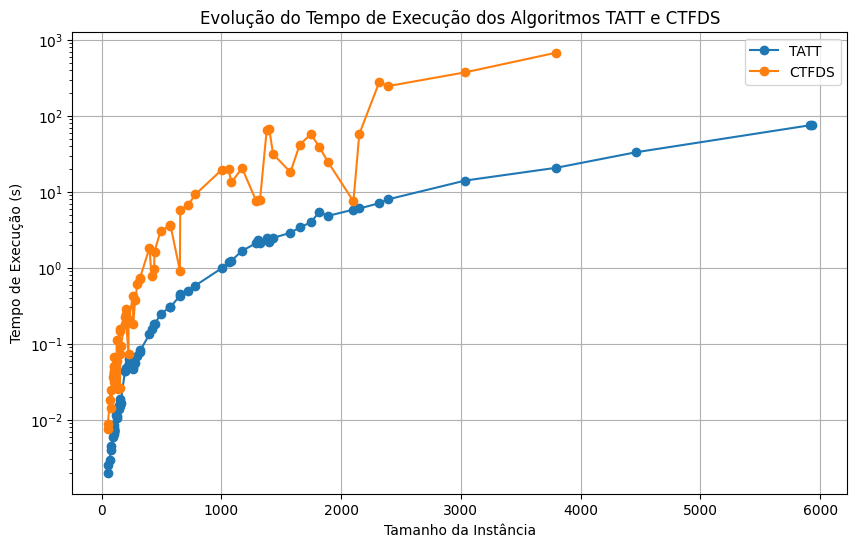

In [22]:
plt.figure(figsize=(10, 6))

# Plotar linha para TATT
plt.semilogy(df_tatt['Tamanho'], df_tatt['Tempo'], label='TATT', marker='o')

# Plotar linha para CTFDS
plt.semilogy(df_ctfds['Tamanho'], df_ctfds['Tempo'], label='CTFDS', marker='o')


# Configurar o gráfico
plt.xlabel('Tamanho da Instância')
plt.ylabel('Tempo de Execução (s)')
plt.title('Evolução do Tempo de Execução dos Algoritmos TATT e CTFDS')
plt.xticks(range(0, 7000, 1000))
plt.legend()
plt.grid(True)
plt.show()


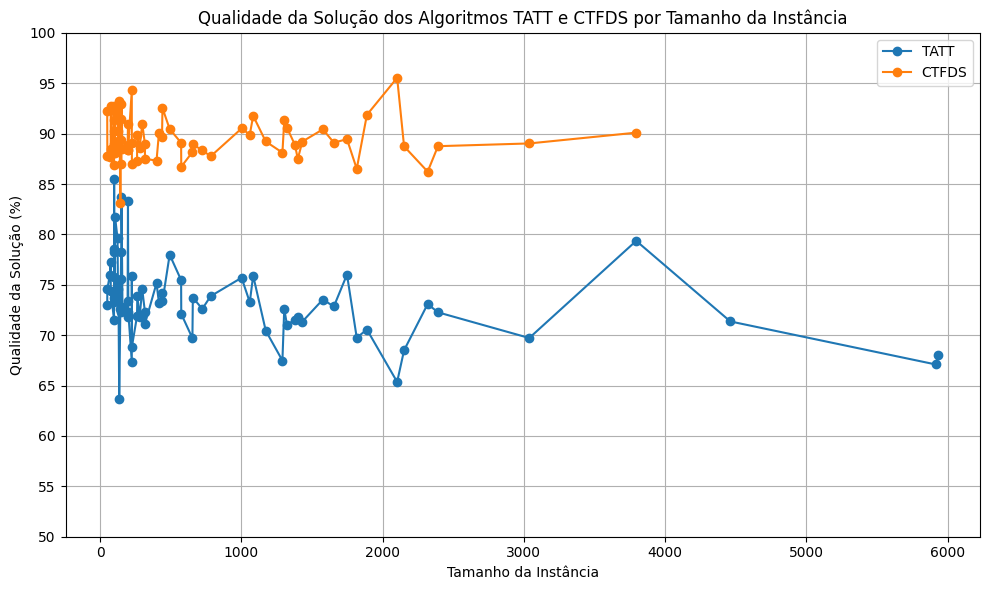

In [23]:
plt.figure(figsize=(10, 6))

# Plotar linha para TATT
plt.plot(df_tatt['Tamanho'], df_tatt['Qualidade'], label='TATT', marker='o')

# Plotar linha para CTFDS
plt.plot(df_ctfds['Tamanho'], df_ctfds['Qualidade'], label='CTFDS', marker='o')

# Configurar o gráfico
plt.xlabel('Tamanho da Instância')
plt.ylabel('Qualidade da Solução (%)')
plt.title('Qualidade da Solução dos Algoritmos TATT e CTFDS por Tamanho da Instância')
plt.xticks(range(0, 7000, 1000))
plt.yticks(range(50, 101, 5)) 
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

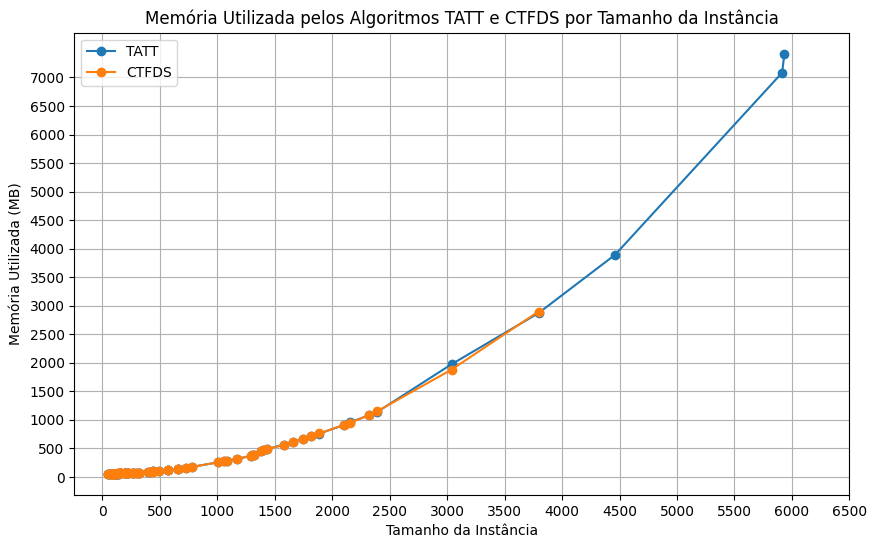

In [27]:
plt.figure(figsize=(10, 6))

# Plotar linha para TATT
plt.plot(df_tatt['Tamanho'], df_tatt['Memoria'], label='TATT', marker='o')

# Plotar linha para CTFDS
plt.plot(df_ctfds['Tamanho'], df_ctfds['Memoria'], label='CTFDS', marker='o')

# Configurar o gráfico
plt.xlabel('Tamanho da Instância')
plt.ylabel('Memória Utilizada (MB)')
plt.title('Memória Utilizada pelos Algoritmos TATT e CTFDS por Tamanho da Instância')
plt.xticks(range(0, 7000, 500))

# df['Memoria'] é float, logo max() nao funciona
plt.yticks(range(0, int(df['Memoria'].max()) + 1, 500))
plt.legend()
plt.grid(True)
plt.show()